In [1]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from DatasetCreator import HAVSDataset
import numpy as np
import sys
import torch
sys.path.append('C:/Users/nyasha/Desktop/Masters-Nyasha/Models') # Add models to system path to allow importing
from CAE import *
from training_functions import *

In [2]:
BATCH_SIZE = 128
NUM_EPOCHS = 100

In [3]:
# Extracting data from the .npz file
processed_data = np.load('C:/Users/nyasha/Desktop/Masters-Nyasha/Processed Data/processed_data.npz') # Unzipping
x_train = processed_data["x_train"]
x_test = processed_data["x_test"]
x_val = processed_data["x_val"] 
y_train = processed_data["y_train"]
y_test = processed_data["y_test"]
y_val = processed_data["y_val"]


In [4]:
# Check if files have been imported correctly
print(x_train.shape)  
print(x_test.shape)
print(x_val.shape)
print(y_train.shape) 
print(y_test.shape)
print(y_val.shape)

(22416, 128, 128)
(7472, 128, 128)
(7472, 128, 128)
(22416,)
(7472,)
(7472,)


In [5]:
# Check if type is correct
print(type(x_train))  
print(type(x_test))
print(type(x_val))
print(type(y_train)) 
print(type(y_test))
print(type(y_val))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Define the transforms
transform = transforms.Compose(
    [
     transforms.ToTensor()
    ])

In [6]:
train_dataset = HAVSDataset(x_train, y_train, transform=transform)
val_dataset = HAVSDataset(x_val, y_val, transform=transform)
test_dataset = HAVSDataset(x_test, y_test, transform=transform)

In [7]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [8]:
model_1  = CAE_2()
print(model_1)

CAE_2(
  (encoder): Encoder_2(
    (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): Decoder_2(
    (deconv3): ConvTranspose2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (deconv2): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (deconv1): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1,

In [9]:
pytorch_total_params_model_1 = sum(p.numel() for p in model_1.parameters())
print(f"The number of  parameters in this model is {pytorch_total_params_model_1}")

The number of  parameters in this model is 3913


In [12]:
device = get_device()
model_on_device = model_1.to(device) # Move model to device

Running on the GPU


In [13]:
# specify loss function
criterion = nn.BCELoss()

# specify loss function
optimizer = torch.optim.SGD(model_on_device.parameters(), lr=0.01)

In [15]:
train_cae(50, train_loader, criterion, optimizer, device, model_on_device)

C:\Users\nyasha\anaconda3\envs\masters\lib\site-packages\torch\nn\functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
Epoch: 1 	Training Loss: 89.872493
Epoch: 2 	Training Loss: 87.492030
Epoch: 3 	Training Loss: 87.382883
Epoch: 4 	Training Loss: 87.333167
Epoch: 5 	Training Loss: 87.304271
Epoch: 6 	Training Loss: 87.284478
Epoch: 7 	Training Loss: 87.271031
Epoch: 8 	Training Loss: 87.260867
Epoch: 9 	Training Loss: 87.252796
Epoch: 10 	Training Loss: 87.246245
Epoch: 11 	Training Loss: 87.241116
Epoch: 12 	Training Loss: 87.236265
Epoch: 13 	Training Loss: 87.232710
Epoch: 14 	Training Loss: 87.229745
Epoch: 15 	Training Loss: 87.226508
Epoch: 16 	Training Loss: 87.224400
Epoch: 17 	Training Loss: 87.221908
Epoch: 18 	Traini

Original Images


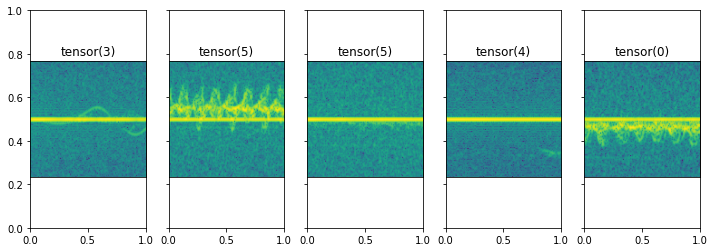

Reconstructed Images


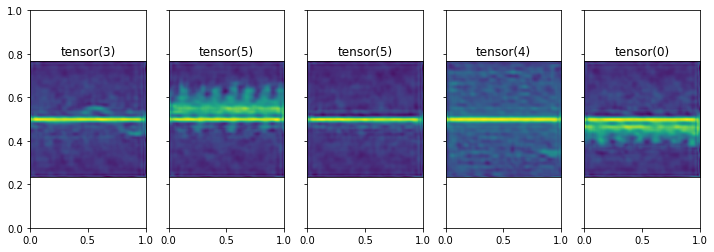

In [17]:
 visualise_cae_performance(train_loader, device, model_on_device, 128, 128, 128)

In [18]:
net = model_on_device
net

CAE_2(
  (encoder): Encoder_2(
    (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): Decoder_2(
    (deconv3): ConvTranspose2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (deconv2): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (deconv1): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1,

In [20]:
# Freeze model weights
for param in net.parameters():
    param.requires_grad = False

In [25]:
# Remove convolutional transpose layer
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.to(device, dtype=torch.float)
net2 = nn.Sequential(*list(model_on_device.children())[:-1])
net2(images).shape

torch.Size([128, 8, 32, 32])

In [21]:
class Flatten(nn.Module):
    def forward(self, x):
        x = x.view(x.size()[0], -1)
        return x

In [26]:
net2.add_module('flatten', Flatten())
net2(images.cuda()).shape

torch.Size([128, 8192])

In [22]:
net.decoder = nn.Sequential(
    Flatten(),
    nn.Linear(8192, 6),
    nn.ReLU(),
    nn.Softmax(dim=1)
)

In [24]:
import torch.optim as optim
net = net.to(device)
class_weights = get_class_weights(y_train, device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [25]:
from torch.autograd import Variable
train_model(100, train_loader, criterion, optimizer, device, model_on_device)


Epoch: 1/100 	 Training Loss: 2.2431845106184483, Accuracy: 51.57476802284083
Epoch: 2/100 	 Training Loss: 2.1169675858691335, Accuracy: 58.80620985010707
Epoch: 3/100 	 Training Loss: 2.091900134459138, Accuracy: 60.25606709493219
Epoch: 4/100 	 Training Loss: 2.0600824151188135, Accuracy: 61.09475374732334
Epoch: 5/100 	 Training Loss: 2.0584077751263976, Accuracy: 61.862062812276946
Epoch: 6/100 	 Training Loss: 2.054444425739348, Accuracy: 62.16541755888651
Epoch: 7/100 	 Training Loss: 2.048696502111852, Accuracy: 62.63829407566024
Epoch: 8/100 	 Training Loss: 2.0308211240917444, Accuracy: 63.00410421127766
Epoch: 9/100 	 Training Loss: 2.020302548073232, Accuracy: 63.454675231977156
Epoch: 10/100 	 Training Loss: 2.028666420839727, Accuracy: 63.766952177016414
Epoch: 11/100 	 Training Loss: 2.045382390730083, Accuracy: 64.03015703069237
Epoch: 12/100 	 Training Loss: 2.0180237712338567, Accuracy: 64.48518915060671
Epoch: 13/100 	 Training Loss: 2.011228554882109, Accuracy: 64.6

In [26]:
eval(test_loader, device, net)

# make sure that when you freeze the network, the network has learnt a lot of diverse data

Accuracy of the network on the test images: 70 %


70.42291220556746

In [58]:
train_model(NUM_EPOCHS, train_loader, criterion, optimizer, device, model_on_device)

Epoch: 1/1 	 Training Loss: 1.8935127835720778, Accuracy: 72.85421127765882
